<a href="https://www.kaggle.com/code/kelixirr/pca-examples-implementation-using-numpy-sklearn?scriptVersionId=154850792" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

## Example 1 - Basic Calculation Of PCA using Numpy

In [61]:
# create a dataset
import numpy as np
X = np.array([[1, 3, 5, 7, 9, 13, 20, 20, 21, 24, 26],
              [5, 7, 11, 14, 15, 17, 18, 19, 21, 22, 26]])
X.shape

(2, 11)

In [2]:
X

array([[ 1,  3,  5,  7,  9, 13, 20, 20, 21, 24, 26],
       [ 5,  7, 11, 14, 15, 17, 18, 19, 21, 22, 26]])

In [3]:
# let's take the transpose to make our dataset
X = X.T
X

array([[ 1,  5],
       [ 3,  7],
       [ 5, 11],
       [ 7, 14],
       [ 9, 15],
       [13, 17],
       [20, 18],
       [20, 19],
       [21, 21],
       [24, 22],
       [26, 26]])

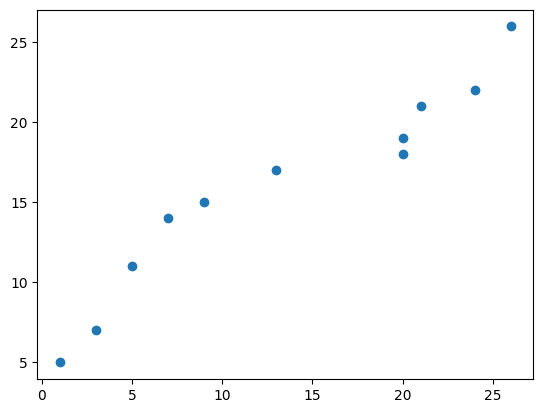

In [6]:
# Goal - Apply PCA and reduce the dataset from 2-D to 1-D
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1]);

In [8]:
# step - 1 -- Normalize the data
X_normalized = X - np.mean(X, axis = 0)
print(X_normalized)

[[-12.54545455 -10.90909091]
 [-10.54545455  -8.90909091]
 [ -8.54545455  -4.90909091]
 [ -6.54545455  -1.90909091]
 [ -4.54545455  -0.90909091]
 [ -0.54545455   1.09090909]
 [  6.45454545   2.09090909]
 [  6.45454545   3.09090909]
 [  7.45454545   5.09090909]
 [ 10.45454545   6.09090909]
 [ 12.45454545  10.09090909]]


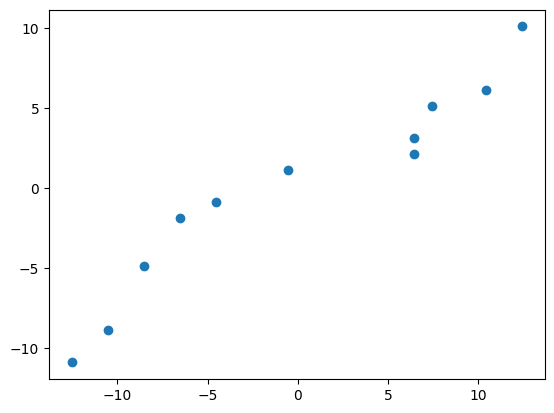

In [9]:
# plot the normalized data
plt.scatter(X_normalized[:, 0], X_normalized[:, 1])

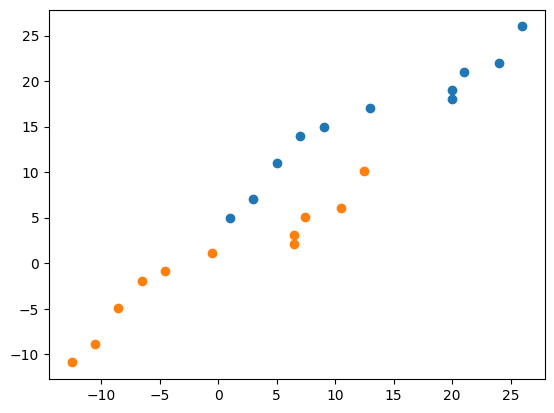

In [10]:
# let's plot both the datasets
plt.scatter(X[:, 0], X[:, 1]);
plt.scatter(X_normalized[:, 0], X_normalized[:, 1]);

Notice the difference by checking the cordinates. 

In [11]:
# Step - 2 Calculate the covariance matrix
C = np.cov(X_normalized, rowvar = False)
C

array([[80.87272727, 54.95454545],
       [54.95454545, 40.69090909]])

In [17]:
# Step - 3 - Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(C)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:")
print(eigenvectors)

Eigenvalues: [119.29375452   2.26988184]
Eigenvectors:
[[ 0.81956216 -0.57299028]
 [ 0.57299028  0.81956216]]


In [22]:
# Step - 4 - Sort the eigenvalues in desc. order
sorted_index = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[sorted_index]
sorted_eigenvalues

array([119.29375452,   2.26988184])

In [29]:
# let's check the variance explained by eigenvalues
total_variance = np.sum(sorted_eigenvalues, axis = 0) 

# it should come out 80.87272727 + 40.69090909 = 121.56363636363636
total_variance

121.56363636363636

So, here we can see that eigenvalues indeed capture the variance and their combination is total variance of the dataset

In [34]:
# percentage of variance explained by each eigenvalues
first = sorted_eigenvalues[:1]/total_variance
second = sorted_eigenvalues[1:]/total_variance
print(first)
print(second)

[0.98132762]
[0.01867238]


As we can see that our first or the largest eigenvalue is capturing the 98% of the variance in the data and second one is capturing less than 1. We usually avoid values less than 1 in practice when we are working with larger datasets

In [23]:
sorted_eigenvectors = eigenvectors[:, sorted_index]
sorted_eigenvectors

array([[ 0.81956216, -0.57299028],
       [ 0.57299028,  0.81956216]])

In [24]:
# Step - 5 select the eigenvectors
n = 1     # since we want to go from 2-D to 1- D 
eigenvectors_subset = sorted_eigenvectors[:,0:n]
eigenvectors_subset

array([[0.81956216],
       [0.57299028]])

In [25]:
# Step - 6 Transform data or project the data onto a subspace give by eigenvectors_subset
X_reduced = np.dot(eigenvectors_subset.transpose(), X_normalized.transpose()).transpose()
X_reduced

array([[-16.53258291],
       [-13.74747803],
       [ -9.81639259],
       [ -6.45829743],
       [ -4.24618282],
       [  0.17804639],
       [  6.48797183],
       [  7.0609621 ],
       [  9.02650482],
       [ 12.05818159],
       [ 15.98926703]])

The above output is the one dimensional representation of the original data. We call the outputs here factor scores along each component. Each row corresponds to an observation, and the column contains the factor score for the first principal component. 

**Interpretation:**

* The factor scores indicate how much each observation contributes to the first principal component.
* Positive scores suggest that the observation has a positive influence on the first principal component.
* Negative scores suggest a negative influence.

**Data Reconstruction:**

* You can reconstruct the data using the factor scores and the eigenvectors. The reconstructed data in the original feature space can be obtained by multiplying the factor scores by the transpose of the eigenvectors and adding back the mean of the original data.

**Data Visualization:**

* Plot the factor scores to visualize the distribution of data along the first principal component. This can help you identify patterns or groupings in your data.
* Clusters or groups of observations with similar patterns along the first principal component may suggest subpopulations or distinct patterns in your data. You can explore whether these clusters correspond to known categories or characteristics.
* Observations with extreme factor scores (either very high or very low) might be considered outliers. Investigate these cases to understand if they represent unusual patterns or if there are data issues.

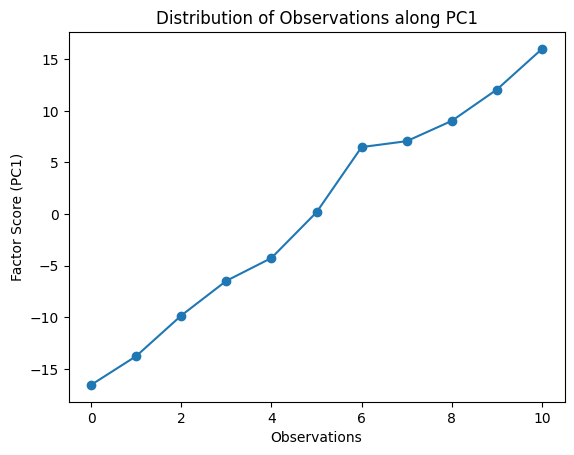

In [50]:
# The factor scores we obtained
factor_scores = X_reduced

# Additional analysis or visualization can be performed based on the factor scores.
# For example, you can plot the factor scores to visualize the distribution.
import matplotlib.pyplot as plt

plt.plot(factor_scores, 'o-')
plt.xlabel('Observations')
plt.ylabel('Factor Score (PC1)')
plt.title('Distribution of Observations along PC1')
plt.show()

### PCA Using Sklearn

In [63]:
# let's use sklearn to calculate PCA
from sklearn.decomposition import PCA
pca = PCA(n_components =1)              # we are going from 2D to 1D and choosing 1 PC
pca.fit(X_normalized)                   # calculation
Xr = pca.transform(X_normalized)        #projection
print(Xr)

[[ 16.53258291]
 [ 13.74747803]
 [  9.81639259]
 [  6.45829743]
 [  4.24618282]
 [ -0.17804639]
 [ -6.48797183]
 [ -7.0609621 ]
 [ -9.02650482]
 [-12.05818159]
 [-15.98926703]]


As you can see the results are same

In [66]:
# here is our covariance matrix same as before
pca.get_covariance()

array([[80.87272727, 54.95454545],
       [54.95454545, 40.69090909]])

In [67]:
pca.get_feature_names_out()

array(['pca0'], dtype=object)

In [71]:
# this will transform the reduced data back to the original feature space
pca.inverse_transform(Xr)  

array([[-13.54947944,  -9.47300927],
       [-11.26691285,  -7.87717125],
       [ -8.04514396,  -5.62469751],
       [ -5.29297622,  -3.70054164],
       [ -3.48001078,  -2.43302147],
       [  0.14592009,   0.10201885],
       [  5.31729623,   3.71754478],
       [  5.78689739,   4.04586264],
       [  7.39778183,   5.1720995 ],
       [  9.88242941,   6.90922082],
       [ 13.1041983 ,   9.16169456]])

## Example 2: PCA For Noise Filtering or Data Compression
We will use digits dataset for this example and show you how you can use PCA for noise filtering and also how you can choose the number of PCs

In [23]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns; sns.set()
digits = load_digits()
digits.data.shape

(1797, 64)

Let's first the PCA without selecting n_components. This will include all PCs. We can plot this to know how much variantion are being explained by how many PCs

### How to choose the n_components

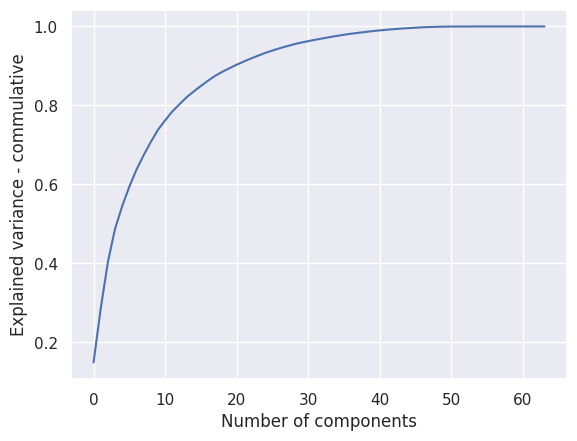

In [24]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance - commulative');

From the graph above we can see that we need at least 20 or above componenets to describe the 90-95% of variance in the data. Reducing the dataset to 3D or 2D may lose a lot of variance. This is how you can choose how many compnonents to include in n_components. Another way of doing PCA in sklearn to include maximum variance is by describing n_components according to percentage you can input values between 0 to 1 in n_components for example n_components = 0.95 to describe 95% of the variance.

Next, we are going to include some noise in our data and then use PCA to filter out those noise. This is just to show you how you can use PCA to filter out noise from a noisy data.

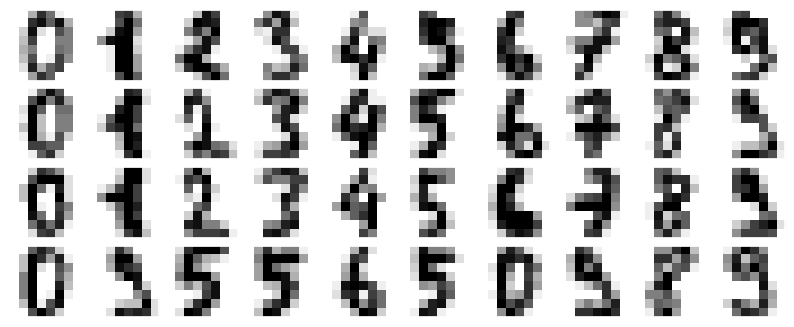

In [25]:
# create a function to plot our datset
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)

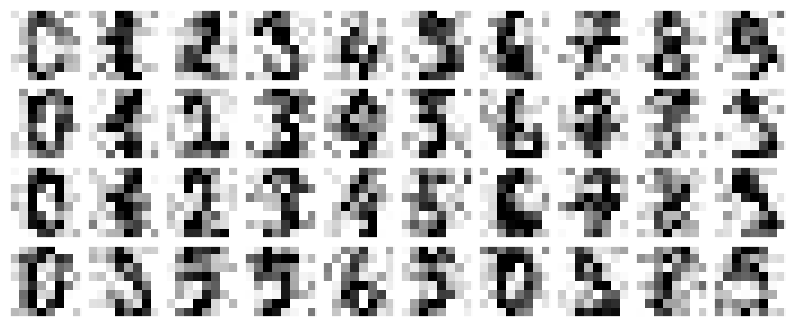

In [31]:
# let's introduce some noise
np.random.seed(42)
noisy_data = np.random.normal(digits.data, 4)
plot_digits(noisy_data)

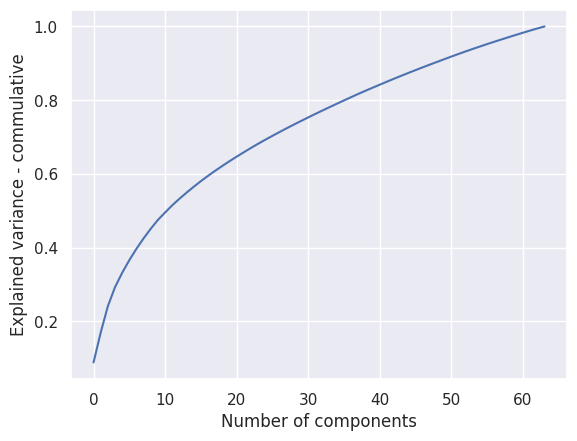

In [33]:
pca = PCA().fit(noisy_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Explained variance - commulative');

In [35]:
# let's see how many components preserve the 60% of variance
pca = PCA(0.60).fit(noisy_data)
pca.n_components_

18

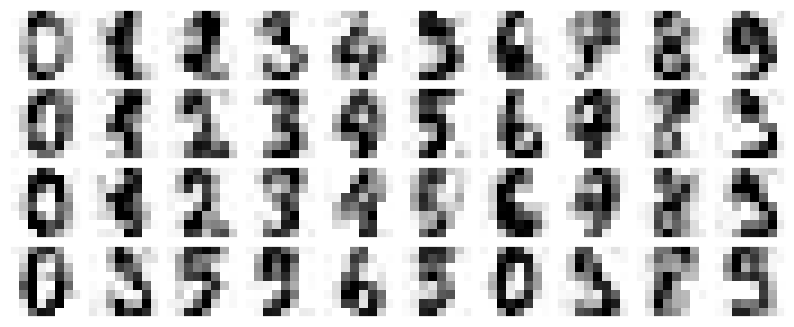

In [36]:
# let's apply and transform it back to recover the filtered data
components = pca.transform(noisy_data)
filtered_data = pca.inverse_transform(components)
plot_digits(filtered_data)

As we can see that it is a bit better than noisy data we can further apply PCA to make things a lot clear. As you can see that the transformed data is not equivalent to original data. This is what is called the reconstruction error.

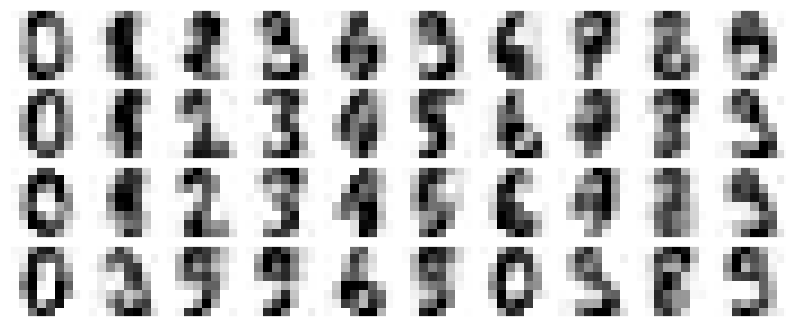

In [42]:
pca = PCA(0.45).fit(noisy_data)
components = pca.transform(noisy_data)
filtered_data = pca.inverse_transform(components)
plot_digits(filtered_data)

Well, it's better than noise but the idea here to learn how to perform PCA to reduce noise in any data. This is how you can do it. One thing you should note here you can also use PCA to compress data as well by using the amount of variance you want to preserve. Alternatively, this means you can use PCA for dimensionality reduction while using higher dimension dataset

## Example 3 - Dimensionality Reduction or Data Compression

In [45]:
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=60)

In [59]:
faces.data.shape

(1348, 2914)

In [64]:
# When the dataset is too big we use randomized PCA in sklearn
rnd_pca = PCA(n_components = 150, svd_solver="randomized").fit(faces.data)
data_reduced = rnd_pca.fit_transform(faces.data)

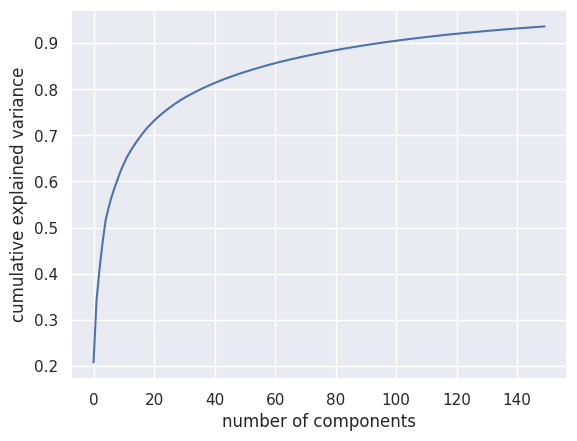

In [65]:
plt.plot(np.cumsum(rnd_pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

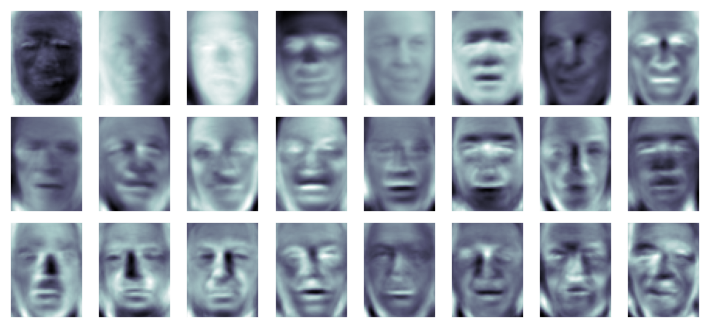

In [66]:
# faces after PCA
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(rnd_pca.components_[i].reshape(62, 47), cmap='bone')

In [68]:
projected_data = rnd_pca.inverse_transform(data_reduced)

In [72]:
projected_data.shape

(1348, 2914)

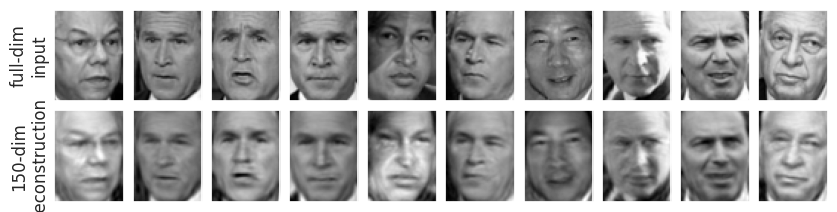

In [69]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks':[], 'yticks':[]},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected_data[i].reshape(62, 47), cmap='binary_r')
    
ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction');

As we can see above that we have reduced the dimensions of our data down to 150 and in a way we are able to compress it down. This is how we can reduced the dimensionality and feed the data_reduced to further algorithm we are try to use for other cases. What this means is in our pipeline we can first perform PCA which will allow us to preserve as much variance as we want or the essential information in our data and then we can use the reduced dimsn into another algorithm to perform our task efficiently without having to worry about bigger data size.

### Other forms of PCA in Practice:

#### Incremental PCA

Incremental PCA is useful when you have a large dataset that doesn't fit into memory, and you want to perform PCA in smaller batches

In [83]:
import numpy as np
from sklearn.decomposition import IncrementalPCA

# Generate a small dataset for demonstration
np.random.seed(42)
X = np.random.rand(100, 5)

# Specify the batch size for Incremental PCA
batch_size = 10

# Create an Incremental PCA object
ipca = IncrementalPCA(n_components=3, batch_size=batch_size)

# Incrementally fit the model on batches of the data
for i in range(0, len(X), batch_size):
    batch = X[i:i + batch_size]
    ipca.partial_fit(batch)

# Transform the entire dataset using the fitted Incremental PCA model
X_transformed = ipca.transform(X)

# Inverse transform to obtain an approximation of the original data
X_approximated = ipca.inverse_transform(X_transformed)

# Print the transformed data
print("Original Data Shape:", X.shape)
print("Transformed Data Shape:", X_transformed.shape)
print("Approximated Data Shape:", X_approximated.shape)

Original Data Shape: (100, 5)
Transformed Data Shape: (100, 3)
Approximated Data Shape: (100, 5)


#### Sparse PCA
It introduces sparsity in the loadings (coefficients) of the principal components. The objective is to find a sparse representation of the data, meaning that most of the coefficients are zero. This can be useful when you suspect that only a small number of features are relevant.

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import SparsePCA
from sklearn.datasets import make_multilabel_classification
from sklearn.preprocessing import StandardScaler

# Generate a synthetic dataset for demonstration
X, _ = make_multilabel_classification(n_samples=100, n_features=20, n_classes=2, n_labels=1, random_state=42)

# Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a Sparse PCA object
spca = SparsePCA(n_components=3, alpha=0.1)  # Adjust alpha for desired sparsity level

# Fit the Sparse PCA model on the scaled data
spca.fit(X_scaled)

# Transform the data using the fitted Sparse PCA model
X_transformed = spca.transform(X_scaled)

# Inverse transform to obtain an approximation of the original data
X_approximated = spca.inverse_transform(X_transformed)


# Print the transformed data
print("Original Data Shape:", X_scaled.shape)
print("Transformed Data Shape:", X_transformed.shape)
print("Approximated Data Shape:", X_approximated.shape)

Original Data Shape: (100, 20)
Transformed Data Shape: (100, 3)
Approximated Data Shape: (100, 20)


#### Truncated PCA
Truncated SVD (Singular Value Decomposition) is often used as an approximation of PCA, especially when dealing with sparse data. The term "truncated" indicates that only the top-k singular values and their corresponding singular vectors are retained, leading to a reduced-dimensional representation of the data. This can be useful for tasks like dimensionality reduction and matrix factorization

In [80]:
import numpy as np
from sklearn.decomposition import TruncatedSVD
from sklearn.datasets import make_sparse_coded_signal
from sklearn.preprocessing import normalize

# Generate a small synthetic sparse dataset for demonstration
n_samples, n_features = 100, 20

# Specify the number of components and nonzero coefficients
n_components, n_nonzero_coefs = 5, 3 

X, _, _ = make_sparse_coded_signal(n_samples=n_samples, n_features=n_features, n_components=n_components,
                                   n_nonzero_coefs=n_nonzero_coefs, random_state=42)

# Normalize for Truncated SVD
X = normalize(X, axis=0)  

# Specify the number of components (k) for Truncated SVD
n_components = 5

# Create a Truncated SVD object
svd = TruncatedSVD(n_components=n_components)

# Fit the Truncated SVD model on the data
X_transformed = svd.fit_transform(X)

# Inverse transform to obtain an approximation of the original data
X_approximated = svd.inverse_transform(X_transformed)

# Print the explained variance ratio for each component
print("Explained Variance Ratio:", svd.explained_variance_ratio_)

# Print the transformed data
print("Original Data Shape:", X.shape)
print("Transformed Data Shape:", X_transformed.shape)
print("Approximated Data Shape:", X_approximated.shape)

Explained Variance Ratio: [0.33868122 0.21872932 0.19055429 0.12585111 0.12618407]
Original Data Shape: (20, 100)
Transformed Data Shape: (20, 5)
Approximated Data Shape: (20, 100)


/opt/conda/lib/python3.10/site-packages/sklearn/datasets/_samples_generator.py:1335: FutureWarning:

The default value of data_transposed will change from True to False in version 1.3



#### Kernel PCA
Kernel PCA (Kernel Principal Component Analysis) is an extension of PCA that uses kernel methods to perform non-linear dimensionality reduction. In standard PCA, the principal components are obtained by linearly transforming the data into a new coordinate system. Kernel PCA, on the other hand, implicitly maps the data into a higher-dimensional space using a kernel function, making it possible to capture non-linear relationships between variables. 

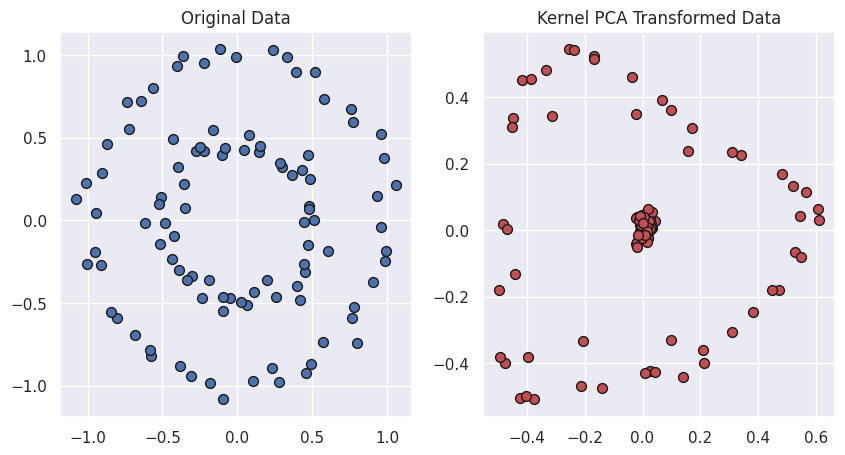

In [85]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

# Generate a synthetic dataset for demonstration (non-linear data)
X, _ = make_circles(n_samples=100, factor=0.5, noise=0.05, random_state=42)

# Apply Kernel PCA with the radial basis function (RBF) kernel
kpca = KernelPCA(kernel='rbf', gamma=15, n_components=2)
X_kpca = kpca.fit_transform(X)

# Plot the original and transformed data
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c='b', marker='o', edgecolors='k', s=50)
plt.title('Original Data')

plt.subplot(1, 2, 2)
plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='r', marker='o', edgecolors='k', s=50)
plt.title('Kernel PCA Transformed Data')

plt.show()

## Example 4: PCA on IRIS Dataset Using Plotly

This data sets consists of 3 different types of irises’ (Setosa, Versicolour, and Virginica) petal and sepal length. 

The rows being the samples and the columns being: Sepal Length, Sepal Width, Petal Length and Petal Width.

In [9]:
# import the data and plot it
import plotly.express as px

df = px.data.iris()
features = ["sepal_width", "sepal_length", "petal_width", "petal_length"]

fig = px.scatter_matrix(
    df,
    dimensions=features,
    color="species"
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [11]:
# let's perform PCA and then plot using all PCs

from sklearn.decomposition import PCA
pca = PCA()
components = pca.fit_transform(df[features])

labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions=range(4),
    color=df["species"]
)
fig.update_traces(diagonal_visible=False)
fig.show()

In [12]:
# plot using 2D
pca = PCA(n_components=2)
components = pca.fit_transform(df[features])

fig = px.scatter(components, x=0, y=1, color=df['species'])
fig.show()

In [13]:
# using 3D
pca = PCA(n_components=3)
components = pca.fit_transform(df[features])

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['species'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [15]:
# plot the explained variance of the dataset
import numpy as np
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)